# 4.2- NLP

NLP trata de aplicaciones que entiendan nuestro idioma, reconocimiento de voz, traducción, comprensión semántica, análisis de sentimiento..

**Usos**

+ Motores de búsqueda
+ Feed de redes sociales
+ Asistentes de voz 
+ Filtros de span
+ Chatbots

**Librerías**

+ NLTK
+ Spacy
+ TFIDF
+ OpenNLP

La dificultad del NLP está en varios niveles:

+ Ambigüedad:

  * Nivel léxico: por ejemplo, varios significados
  * Nivel referencial: anáforas, metáforas, etc...
  * Nivel estructural: la semántica es necesaria para entender la estructura de una oración
  * Nivel pragmático: dobles sentidos, ironía, humor
  
+ Detección de espacios
+ Recepción imperfecta: acentos, -ismos, OCR

El proceso es similar que en USL, primero se vectorizan las palabras y después se miden sus distancias/similitudes. 

In [1]:
# lista de 100 peliculas

titles=open('../data/title_list.txt').read().split('\n')[:100]

titles

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic',
 'Lawrence of Arabia',
 'The Godfather: Part II',
 'Psycho',
 'Sunset Blvd.',
 'Vertigo',
 'On the Waterfront',
 'Forrest Gump',
 'The Sound of Music',
 'West Side Story',
 'Star Wars',
 'E.T. the Extra-Terrestrial',
 '2001: A Space Odyssey',
 'The Silence of the Lambs',
 'Chinatown',
 'The Bridge on the River Kwai',
 "Singin' in the Rain",
 "It's a Wonderful Life",
 'Some Like It Hot',
 '12 Angry Men',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',
 'Amadeus',
 'Apocalypse Now',
 'Gandhi',
 'The Lord of the Rings: The Return of the King',
 'Gladiator',
 'From Here to Eternity',
 'Saving Private Ryan',
 'Unforgiven',
 'Raiders of the Lost Ark',
 'Rocky',
 'A Streetcar Named Desire',
 'The Philadelphia Story',
 'To Kill a Mockingbird',
 'An American in Pari

In [2]:
synopsis=open('../data/synopses_list.txt').read().split('\n BREAKS HERE')[:100]

synopsis[0][:200]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son,"

### Limpieza

In [ ]:
#!pip install spacy

In [3]:
import string
import spacy

from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import re

In [4]:
nlp=spacy.load('en')

parser=English()

In [5]:
def spacy_tokenizer(sentence):
    
    tokens=parser(sentence)
    
    filtered_tokens=[]
    for word in tokens:
        lemma=word.lemma_.lower().strip()
        
        if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$', lemma):
            filtered_tokens.append(lemma)
            
    return filtered_tokens

In [6]:
spacy_tokenizer(synopsis[0][:200])

['plot',
 'edit',
 'edit',
 'edit',
 'day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hears',
 'requests',
 'role',
 'godfather',
 'don',
 'new',
 'york',
 'crime',
 'family',
 'vito',
 'youngest',
 'son']

### TFIDF (term frequency inverse document frequency)

In [7]:
type(synopsis)

list

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tfidf=TfidfVectorizer(min_df=.15, tokenizer=spacy_tokenizer)

In [11]:
#help(tfidf)

In [12]:
tfidf_matrix=tfidf.fit_transform(synopsis)

In [13]:
tfidf_matrix.shape

(100, 254)

In [14]:
tfidf_matrix

<100x254 sparse matrix of type '<class 'numpy.float64'>'
	with 6489 stored elements in Compressed Sparse Row format>

In [15]:
import pandas as pd
pd.DataFrame(tfidf_matrix).head()

,0
0,"(0, 110)\t0.0795498967156828\n (0, 98)\t0.0..."
1,"(0, 34)\t0.07983654988983906\n (0, 71)\t0.1..."
2,"(0, 188)\t0.08130989727604856\n (0, 68)\t0...."
3,"(0, 133)\t0.07493861532072099\n (0, 55)\t0...."
4,"(0, 213)\t0.08554981380443288\n (0, 52)\t0...."


In [16]:
terms=tfidf.get_feature_names()
terms[:15]

['able',
 'agrees',
 'air',
 'american',
 'apartment',
 'army',
 'arrive',
 'arrives',
 'asks',
 'attack',
 'attempt',
 'attempts',
 'attention',
 'away',
 'battle']

### Distancias

In [18]:
from sklearn.metrics.pairwise import cosine_similarity as cos

In [19]:
dist=1-cos(tfidf_matrix)

dist.shape

(100, 100)

In [20]:
dist

array([[-2.22044605e-16,  8.71403386e-01,  8.82700207e-01, ...,
         7.56453457e-01,  8.81292056e-01,  8.72030953e-01],
       [ 8.71403386e-01,  0.00000000e+00,  7.72031866e-01, ...,
         8.09164566e-01,  8.36998279e-01,  8.92111515e-01],
       [ 8.82700207e-01,  7.72031866e-01, -2.22044605e-16, ...,
         8.09233859e-01,  8.53123482e-01,  7.58211878e-01],
       ...,
       [ 7.56453457e-01,  8.09164566e-01,  8.09233859e-01, ...,
         0.00000000e+00,  7.04903724e-01,  9.23311908e-01],
       [ 8.81292056e-01,  8.36998279e-01,  8.53123482e-01, ...,
         7.04903724e-01, -2.22044605e-16,  8.79640027e-01],
       [ 8.72030953e-01,  8.92111515e-01,  7.58211878e-01, ...,
         9.23311908e-01,  8.79640027e-01,  2.22044605e-16]])

### Clustering

In [21]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

import numpy as np

In [22]:
from umap import UMAP

In [23]:
umap=UMAP(n_neighbors=5, random_state=42)
emb=umap.fit_transform(dist)

In [26]:
emb.shape

(100, 2)

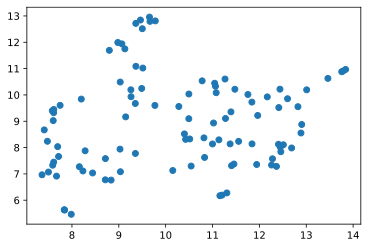

In [27]:
plt.scatter(emb[:,0], emb[:,1]);

In [28]:
from hdbscan import HDBSCAN

In [29]:
hdbscan=HDBSCAN(min_cluster_size=5)

clusters=hdbscan.fit_predict(emb)

In [30]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4])

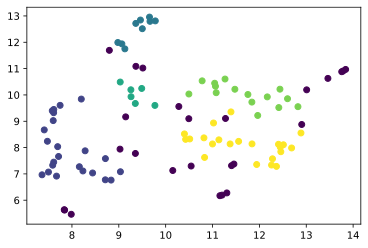

In [31]:
plt.scatter(emb[:,0], emb[:,1], c=clusters);

### titulos de los clusters

In [32]:
def get_titles_from_cluster(c):
    return pd.Series(titles)[clusters==c]

In [48]:
get_titles_from_cluster(0)

2                                      Schindler's List
10                                   Lawrence of Arabia
19                                            Star Wars
24                         The Bridge on the River Kwai
27                                     Some Like It Hot
29    Dr. Strangelove or: How I Learned to Stop Worr...
31                                       Apocalypse Now
33        The Lord of the Rings: The Return of the King
34                                            Gladiator
36                                  Saving Private Ryan
37                                           Unforgiven
38                              Raiders of the Lost Ark
48                                               Patton
49                                                 Jaws
50                                           Braveheart
52                   Butch Cassidy and the Sundance Kid
53                     The Treasure of the Sierra Madre
55                                              

In [41]:
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

tfidf_df.head()

,able,agrees,air,american,apartment,army,arrive,arrives,asks,attack,...,window,woman,work,working,world,wounded,year,years,york,young
0,0.0,0.064639,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.053967,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.07811,0.062870,0.159100,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.074787,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.091133,0.073637,0.0,0.00000,0.133108,0.000000,0.0
2,0.0,0.073228,0.000000,0.000000,0.0,0.121965,0.000000,0.146456,0.061139,0.0,...,0.0,0.0,0.000000,0.000000,0.197012,0.0,0.00000,0.000000,0.000000,0.0
3,0.0,0.000000,0.069901,0.089895,0.0,0.085550,0.000000,0.000000,0.128654,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.06207,0.000000,0.189641,0.0
4,0.0,0.069514,0.000000,0.081106,0.0,0.077186,0.075976,0.000000,0.000000,0.0,...,0.0,0.0,0.079747,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0


In [42]:
tfidf_df.shape

(100, 254)

In [43]:
def get_df_from_cluster(c):
    return tfidf_df[clusters==c]

In [44]:
get_df_from_cluster(3).head()

,able,agrees,air,american,apartment,army,arrive,arrives,asks,attack,...,window,woman,work,working,world,wounded,year,years,york,young
3,0.0,0.000000,0.069901,0.089895,0.000000,0.08555,0.0,0.0,0.128654,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.062070,0.000000,0.189641,0.000000
15,0.0,0.082064,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.094145,0.109297,0.000000,0.104927,0.000000,0.079818,0.000000,0.000000
23,0.0,0.000000,0.000000,0.000000,0.093141,0.00000,0.0,0.0,0.060820,0.088028,...,0.0,0.313574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068967
35,0.0,0.065949,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.055061,0.239079,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.159386,0.000000,0.000000,0.000000
39,0.0,0.000000,0.000000,0.082467,0.000000,0.00000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.076064,0.000000,0.298941,0.000000,0.000000,0.100376


In [45]:
get_df_from_cluster(3).T.head()

,3,15,23,35,39,40,45,46,51,68,70,71,72,73,74
able,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097556,0.0,0.000000,0.102647,0.0,0.0,0.094421,0.000000,0.000000
agrees,0.000000,0.082064,0.000000,0.065949,0.000000,0.000000,0.000000,0.0,0.146148,0.077071,0.0,0.0,0.212685,0.158405,0.105941
air,0.069901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
american,0.089895,0.000000,0.000000,0.000000,0.082467,0.000000,0.170927,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
apartment,0.000000,0.000000,0.093141,0.000000,0.000000,0.257296,0.000000,0.0,0.093432,0.098543,0.0,0.0,0.000000,0.000000,0.000000


In [57]:
top_words_cluster=get_df_from_cluster(1).T.sum(axis=1).sort_values(ascending=False)

top_words_cluster.head()

family    3.025860
war       1.486260
father    0.941453
home      0.937201
life      0.890291
dtype: float64

In [58]:
get_titles_from_cluster(1)

0                   The Godfather
6              Gone with the Wind
11         The Godfather: Part II
44    The Best Years of Our Lives
47                 Doctor Zhivago
58                    The Pianist
59                     Goodfellas
77                          Giant
78            The Grapes of Wrath
dtype: object

## NLP_es 

In [ ]:
#!python3 -m spacy download es_core_news_md

In [59]:
nlp=spacy.load('es_core_news_md')

In [60]:
doc2vec=nlp('hola me llamo Pepe').vector.sum()

In [61]:
word2vec=(nlp('hola').vector+nlp('me').vector+nlp('llamo').vector+nlp('Pepe').vector).sum()/4

In [62]:
doc2vec

-31.763054

In [63]:
word2vec

-31.76305389404297

##### similitud

In [64]:
nlp('quiero saludar a todos los alumnos de ironhack').similarity(nlp('quiero dar saludos'))

0.3648900238375485

In [66]:
nlp('ironhack').similarity(nlp('no todo es real'))

0.0

In [67]:
tokens_1=spacy_tokenizer('quiero saludar a todos')
tokens_2=spacy_tokenizer('saludos al perro')

In [68]:
def get_simil(t1, t2):
    return nlp(' '.join(t1)).similarity(nlp(' '.join(t2)))

In [70]:
get_simil(tokens_1, tokens_2)

0.26943539180268417

# WordClouds

In [71]:
# librerias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
#!python3 -m spacy download en
from spacy.lang.es import Spanish
#!python3 -m spacy download es_core_news_md


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp=set(stopwords.words('spanish'))
stop_words_en=set(stopwords.words('english'))
stop_words=stop_words_sp | stop_words_en


import re

from langdetect import detect

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /Users/iudh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
def tokenizer(txt):  # texto
    
    if detect(txt)=='en':    # si el texto esta en ingles...
        nlp=spacy.load('en')
        parser=English()
        
    elif detect(txt)=='es':   # si el texto esta en castellano...
        nlp=spacy.load('es_core_news_md')
        parser=Spanish()
        
    else:
        return 'No es castellano ni ingles.'
    
    tokens=parser(txt)
    
    filtered_tokens=[]
    
    for word in tokens:
        lemma=word.lemma_.lower().strip()
        if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$', lemma):
            filtered_tokens.append(lemma)
    
    return ' '.join(filtered_tokens)

In [73]:
def wordcloud(df, col):
    
    wordcloud=WordCloud(width=1600,
                        height=400,
                        stopwords=stop_words).generate(' '.join([e for e in df[col]]))
    
    plt.figure(figsize=(15, 10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('images/wordcloud.png', facecolor='k', bbox_inches='tight')
    plt.show();

In [74]:
# texto

txt=open('../data/synopses_list.txt').read().split('\n BREAKS HERE')[:100]

In [75]:
# paso a df

df=pd.DataFrame(txt, columns=['text'])

df.text=df.text.apply(tokenizer)

df.head()

,text
0,plot edit edit edit day daughter wedding vito ...
1,plot edit edit edit banker andy dufresne convi...
2,plot edit edit edit germans polish jews ghetto...
3,plot edit edit edit brief scene aging overweig...
4,plot edit edit edit early december american ex...


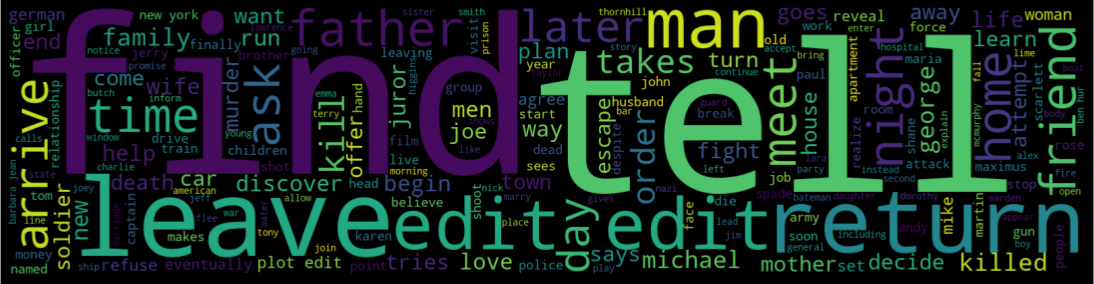

In [76]:
# wordcloud

wordcloud(df, 'text')

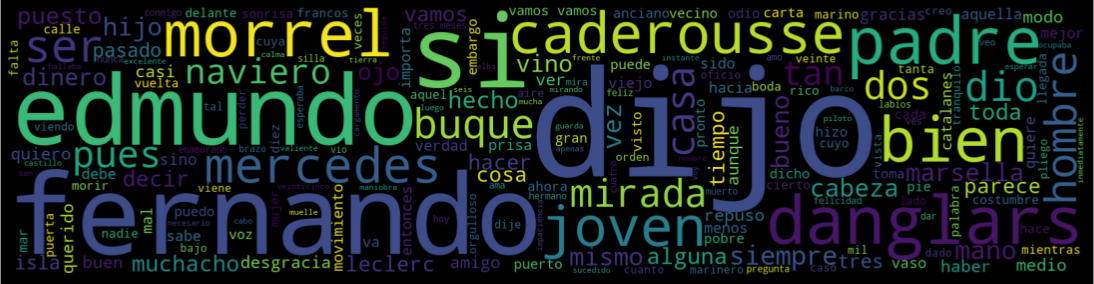

In [77]:
# en castellano

txt2=open('../data/conde.txt').read().split('\n BREAKS HERE')[:100]

df2=pd.DataFrame(txt2, columns=['text'])

df2.text=df2.text.apply(tokenizer)

wordcloud(df2, 'text')

#### Mascara

In [78]:
# imagen mascara

vino_mask=np.array(Image.open('images/vino.png'))

In [79]:
vino_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [80]:
# transformacion de la mascara

def transform(val):
    if val==0:
        return 255
    else:
        return val

In [81]:
t_vino_mask=np.ndarray((vino_mask.shape[0], vino_mask.shape[1]), np.int32)


for i in range(len(vino_mask)):
    t_vino_mask[i]=list(map(transform, vino_mask[i]))

In [82]:
t_vino_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

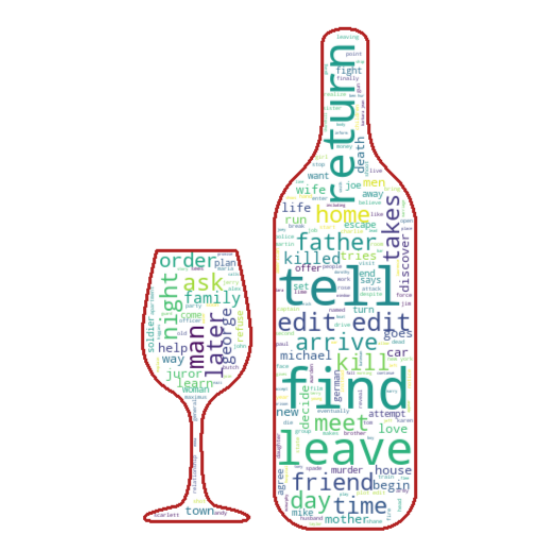

In [83]:
w=WordCloud(background_color='white',
            max_words=1000,
            mask=t_vino_mask,
            stopwords=stop_words,
            contour_width=3,
            contour_color='firebrick').generate(' '.join([e for e in df.text]))


w.to_file('images/copa&botella.png')

plt.figure(figsize=(15, 10))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show();

### ejemplo con todo

In [84]:
def tokenizer(lst):  # ahora entra una lista
    
    en=0
    es=0
    
    for txt in lst:
        try:
            txt=str(txt)
            if detect(txt)=='en':    # si el texto esta en ingles...
                en+=1
                
                nlp=spacy.load('en')
                parser=English()
                tokens=parser(txt)

                tokens_en=[]

                for word in tokens:
                    lemma=word.lemma_.lower().strip()
                    if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$', lemma):
                        tokens_en.append(lemma)

            elif detect(txt)=='es':   # si el texto esta en castellano...
                es+=1
                
                nlp=spacy.load('es_core_news_md')
                parser=Spanish()
                tokens=parser(txt)

                tokens_es=[]

                for word in tokens:
                    lemma=word.lemma_.lower().strip()
                    if lemma not in STOP_WORDS and re.search('^[a-zA-Z]+$', lemma):
                        tokens_es.append(lemma)

            else:
                print ('No se reconoce idioma (EN / ES)...')
        
        except:
            print ('ERROR...')
            continue
    
    
    return ' '.join(tokens_en), ' '.join(tokens_es), en, es

In [85]:
# texto con los dos idiomas

mix_text=txt+txt2

tokens=tokenizer(mix_text)

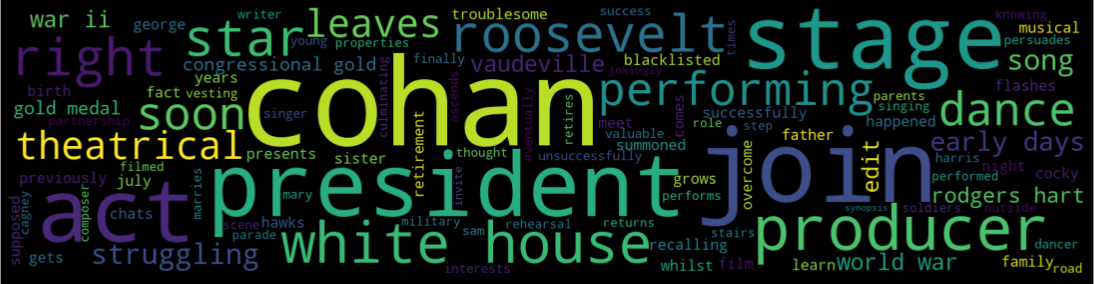

In [86]:
# wordcloud ingles

serie_en=pd.DataFrame({'en':tokens[0]}, index=[0])

wordcloud(serie_en, 'en')

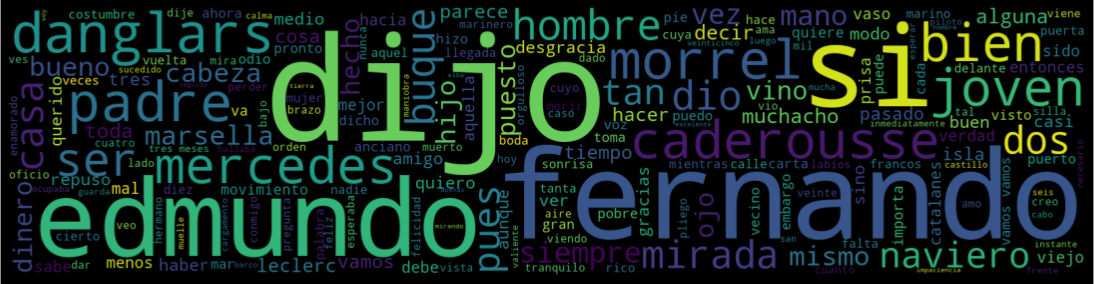

In [87]:
# wordcloud castellano

serie_es=pd.DataFrame({'es':tokens[1]}, index=[0])

wordcloud(serie_es, 'es')

In [88]:
tokens[2]

100

In [89]:
tokens[3]

1

## NER

### Transformers (creacion de texto)

In [ ]:
#!pip install transformers